Analyzing the paintings, part 3 to make the notebooks shorter.

In [28]:
%run ../scripts/notebook_settings_lean.py

/faststorage/project/baboondiversity/people/eriks/baboon_first_analysis/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


The 8 Colors

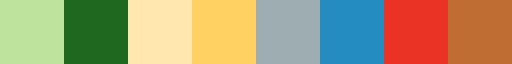

In [29]:
step_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/"
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_8_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "population", "inclusion"])
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")

mycols = sns.color_palette(["#BEE39C", "#1F681F", "#FFE7AF",
                            "#FFD062", "#9EADB2", "#258CC1", "#EA3324", "#C06D34"])
name_order = idfile.loc[idfile.inclusion==1].sort_values(by="population").population.unique()
color_dir = {}
for i in range(len(name_order)):
    color_dir[name_order[i]] = mycols[i]
# This order of color is based on the alphabetical ordering of the 14 clusters
mycols_cmap = ListedColormap(mycols.as_hex())
mycols_cmap

In [30]:
#Ancestry component analysis

def total_ancestry_parse(path, ID, population, chrom):
    f = open(path)
    lines = f.readlines()
    # Lines 11 to 16 contain the information for PC1, one-date fit.
    df = pd.DataFrame()
    df["surrogate"] = lines[1].strip().split(" ")
    df["proportion"] = lines[2].strip().split(" ")
    df["PGDP_ID"] = ID
    df["population"] = population
    df["chrom"] = chrom
    return df

In [31]:
step_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/"
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_8_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "population", "inclusion"])
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")

rundir = "chr8_8_cluster_large/"
chrom = "chr8"
df_l = []
for population in idfile.loc[idfile.inclusion==1].population.unique():
    for ID in idfile.loc[(idfile.inclusion==1) & (idfile.population == population)].PGDP_ID:
        total_path = step_path+rundir+population+"_"+rundir+"globetrotter_intermediate/"+ID+".main.txt"
        df = total_ancestry_parse(total_path, ID, population, chrom)
        df_l.append(df)

rundir = "chrX_8_cluster_large/"
chrom = "chrX"
for population in idfile.loc[idfile.inclusion==1].population.unique():
    for ID in idfile.loc[(idfile.inclusion==1) & (idfile.population == population)].PGDP_ID:
        total_path = step_path+rundir+population+"_"+rundir+"globetrotter_intermediate/"+ID+".main.txt"
        df = total_ancestry_parse(total_path, ID, population, chrom)
        df_l.append(df)
df_ancestry = pd.concat(df_l)
df_ancestry = df_ancestry.astype({"proportion": float})
df_ancestry_8_cluster = df_ancestry


#chr8
chrom = "chr8"
l_l = []
i = 0
sort_pop = sorted(idfile.loc[idfile.inclusion==1].population.unique())
for population in sort_pop:
    pop_df = df_ancestry.loc[(df_ancestry.population == population) & (df_ancestry.chrom == chrom)]
    ID_count = len(pop_df.PGDP_ID.unique())
    l_l.append([])
    l_l[i].append(population)
    for surrogate in sort_pop:
        l_l[i].append(sum(pop_df.loc[pop_df.surrogate == surrogate].proportion)/ID_count)
    i += 1
df_8_8 = pd.DataFrame(columns=["Species"]+sort_pop,
                  data=l_l)
df_8_8 = df_8_8.set_index('Species')
df_8_8.columns.name = "Source populations"
df_8_8

#chrX
chrom = "chrX"
l_l = []
i = 0
sort_pop = sorted(idfile.loc[idfile.inclusion==1].population.unique())
for population in sort_pop:
    pop_df = df_ancestry.loc[(df_ancestry.population == population) & (df_ancestry.chrom == chrom)]
    ID_count = len(pop_df.PGDP_ID.unique())
    l_l.append([])
    l_l[i].append(population)
    for surrogate in sort_pop:
        l_l[i].append(sum(pop_df.loc[pop_df.surrogate == surrogate].proportion)/ID_count)
    i += 1
df_X_8 = pd.DataFrame(columns=["Species"]+sort_pop,
                  data=l_l)
df_X_8 = df_X_8.set_index('Species')
df_X_8.columns.name = "Source populations"
df_X_8

Source populations,anubis_ethiopia,anubis_tanzania,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus
Species,,,,,,,,
anubis_ethiopia,0.000000,0.657648,0.081718,0.034709,0.141370,0.034347,0.038097,0.012112
anubis_tanzania,0.253021,0.000000,0.302156,0.137845,0.119050,0.075631,0.083756,0.028541
cyno_central,0.077776,0.487556,0.000000,0.208024,0.064590,0.075230,0.037303,0.049136
cyno_western,0.022666,0.259095,0.264866,0.000000,0.023590,0.349131,0.003351,0.071052
hamadryas,0.272818,0.463259,0.112588,0.051565,0.000000,0.043557,0.041870,0.014341
kindae,0.061691,0.236285,0.140138,0.395361,0.052160,0.000000,0.031970,0.082395
papio,0.117473,0.517286,0.144063,0.051570,0.083379,0.064135,0.000000,0.022095
ursinus,0.050446,0.200356,0.229899,0.244194,0.039848,0.211565,0.023693,0.000000


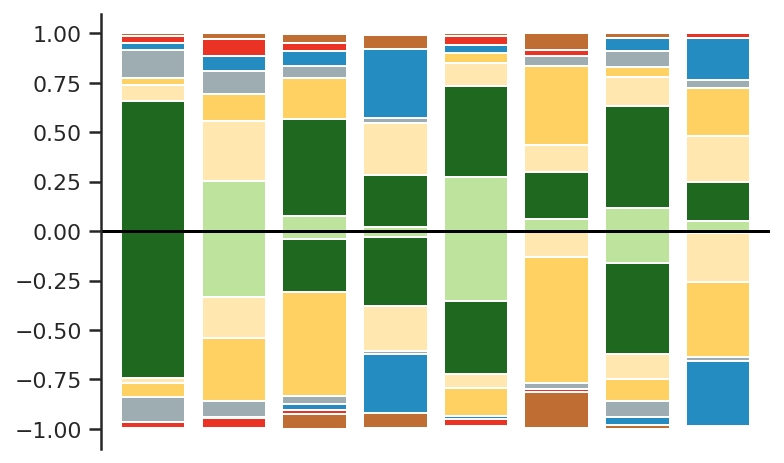

In [32]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots()
    df_X_8.plot(kind='bar', stacked=True,  ax=ax, width=0.8, legend=False, cmap=mycols_cmap)
    (-1*df_8_8).plot(kind='bar', stacked=True,  ax=ax, width=0.8, legend=False, cmap=mycols_cmap)# Color map can be your population colormap
    plt.axhline(0, color='black')
    sns.despine()
    #ax.legend(bbox_to_anchor=(1, 1.02))
    ax.axes.get_xaxis().set_visible(False)
    ax.spines['bottom'].set_visible(False)


In [33]:
df_X_8/(df_X_8+df_8_8)

Source populations,anubis_ethiopia,anubis_tanzania,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus
Species,,,,,,,,
anubis_ethiopia,NaN,0.470084,0.757595,0.321796,0.526767,1.000000,0.589294,1.000000
anubis_tanzania,0.430804,NaN,0.593099,0.301339,0.598030,0.968728,0.609951,0.956256
cyno_central,0.653713,0.645263,NaN,0.284522,0.615121,0.695203,0.646551,0.401854
cyno_western,0.426515,0.426408,0.539002,NaN,0.574003,0.538568,1.000000,0.494962
hamadryas,0.434362,0.559178,0.607465,0.267988,NaN,0.701042,0.544085,0.667562
kindae,0.952118,1.000000,0.522394,0.383833,0.624113,NaN,0.648081,0.314303
papio,0.419888,0.529187,0.530819,0.325481,0.505701,0.597474,NaN,0.543429
ursinus,0.841622,1.000000,0.479073,0.393442,0.666029,0.389064,0.870350,NaN


In [34]:
df_X_8

Source populations,anubis_ethiopia,anubis_tanzania,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus
Species,,,,,,,,
anubis_ethiopia,0.000000,0.657648,0.081718,0.034709,0.141370,0.034347,0.038097,0.012112
anubis_tanzania,0.253021,0.000000,0.302156,0.137845,0.119050,0.075631,0.083756,0.028541
cyno_central,0.077776,0.487556,0.000000,0.208024,0.064590,0.075230,0.037303,0.049136
cyno_western,0.022666,0.259095,0.264866,0.000000,0.023590,0.349131,0.003351,0.071052
hamadryas,0.272818,0.463259,0.112588,0.051565,0.000000,0.043557,0.041870,0.014341
kindae,0.061691,0.236285,0.140138,0.395361,0.052160,0.000000,0.031970,0.082395
papio,0.117473,0.517286,0.144063,0.051570,0.083379,0.064135,0.000000,0.022095
ursinus,0.050446,0.200356,0.229899,0.244194,0.039848,0.211565,0.023693,0.000000


In [35]:
df_8_8

Source populations,anubis_ethiopia,anubis_tanzania,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus
Species,,,,,,,,
anubis_ethiopia,0.000000,0.741354,0.026147,0.073152,0.127003,0.000000,0.026551,0.000000
anubis_tanzania,0.334301,0.000000,0.207297,0.319596,0.080020,0.002441,0.053560,0.001306
cyno_central,0.041200,0.268036,0.000000,0.523112,0.040414,0.032983,0.020392,0.073138
cyno_western,0.030476,0.348528,0.226535,0.000000,0.017507,0.299127,0.000000,0.072498
hamadryas,0.355271,0.365206,0.072753,0.140850,0.000000,0.018575,0.035085,0.007142
kindae,0.003102,0.000000,0.128123,0.634672,0.031414,0.000000,0.017360,0.179756
papio,0.162299,0.460224,0.127335,0.106872,0.081499,0.043208,0.000000,0.018564
ursinus,0.009493,0.000000,0.249983,0.376466,0.019981,0.332215,0.003529,0.000000


/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

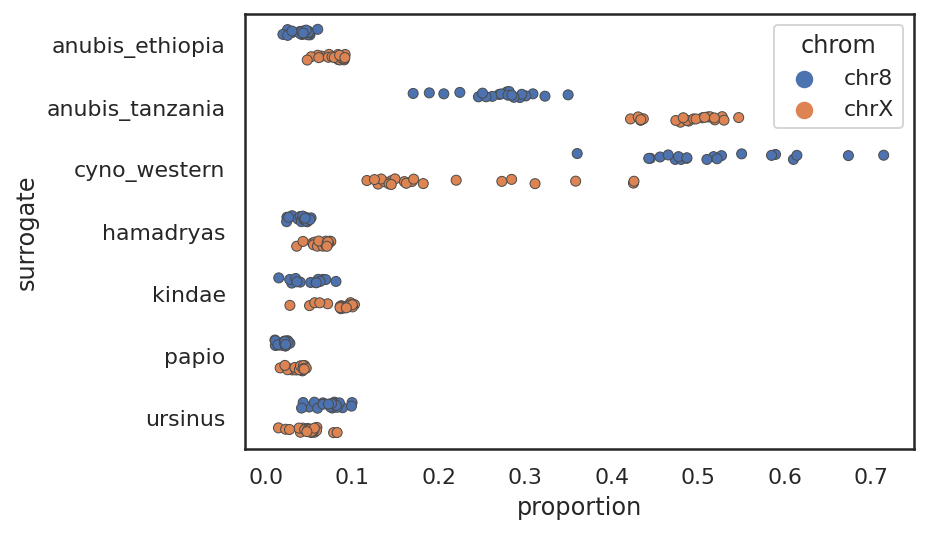

In [36]:
sns.stripplot(data=df_ancestry.loc[(df_ancestry.population=="cyno_central")].sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5)

[Text(0.5, 1.0, 'Cyno, Mikumi')]

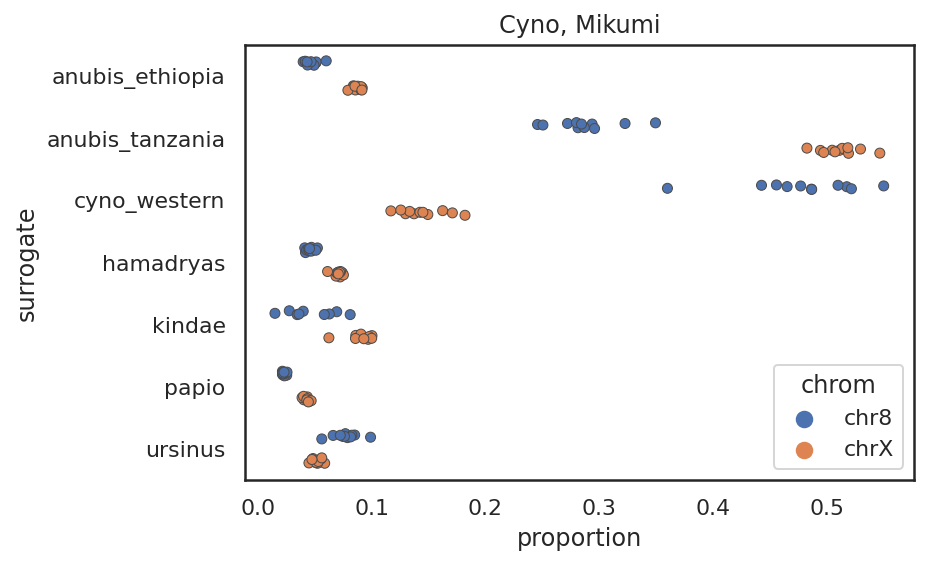

In [70]:
cyno_mikumi = df_ancestry.loc[df_ancestry.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Mikumi, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_mikumi.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", dodge=True, linewidth=0.5).set(title="Cyno, Mikumi")

[Text(0.5, 1.0, 'Cyno, Ruaha')]

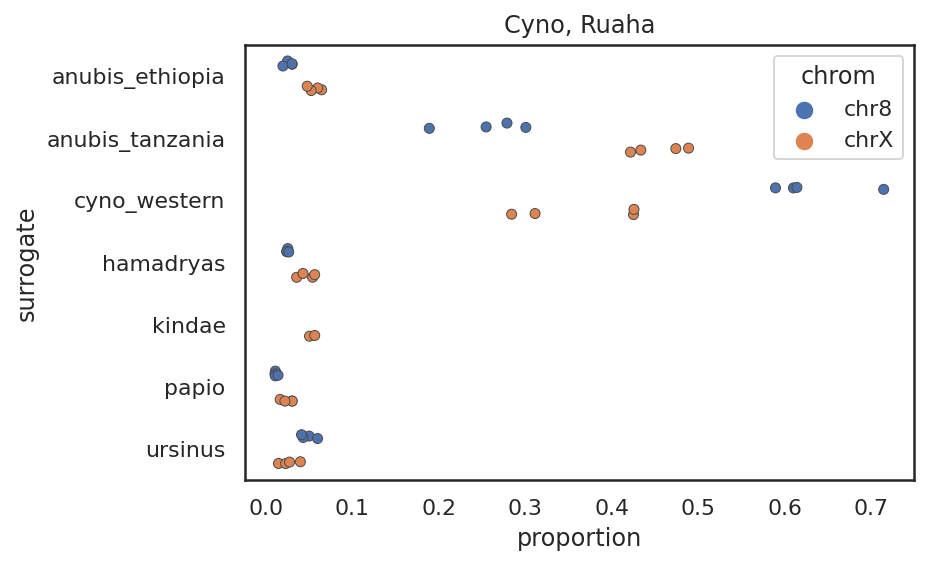

In [72]:
cyno_ruaha = df_ancestry.loc[df_ancestry.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Ruaha, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_ruaha.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", dodge=True, linewidth=0.5).set(title="Cyno, Ruaha")

<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

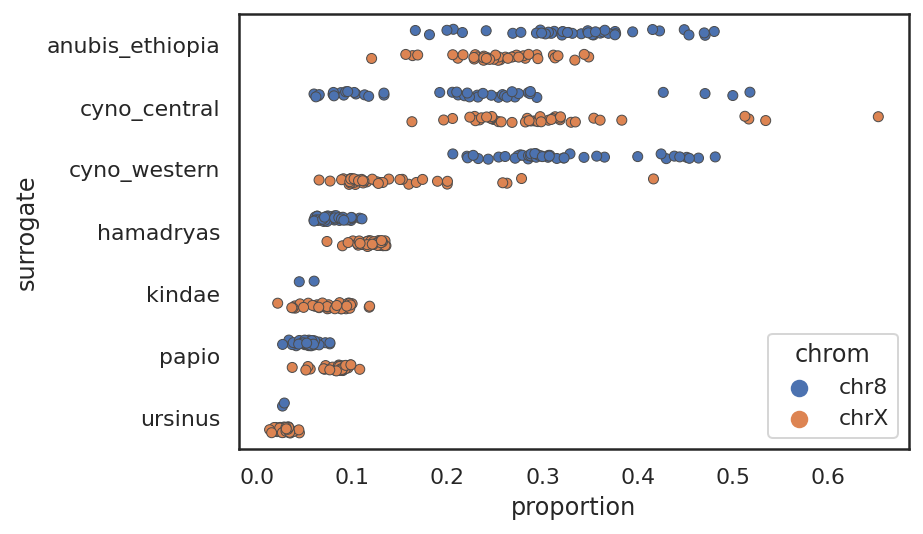

In [60]:
sns.stripplot(data=df_ancestry.loc[df_ancestry.population=="anubis_tanzania"].sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", linewidth=0.5, dodge=True)

[Text(0.5, 1.0, 'Anubis, Tarangire')]

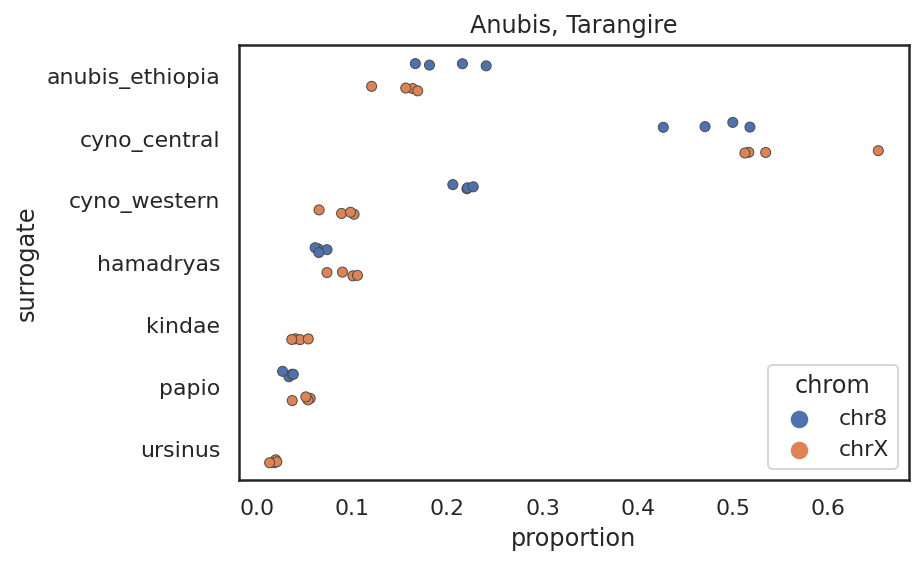

In [77]:
anubis_tarangire = df_ancestry.loc[df_ancestry.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Tarangire, Tanzania"].PGDP_ID)]

sns.stripplot(data=anubis_tarangire.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", dodge=True, linewidth=0.5).set(title="Anubis, Tarangire")

[Text(0.5, 1.0, 'Anubis, Serengeti')]

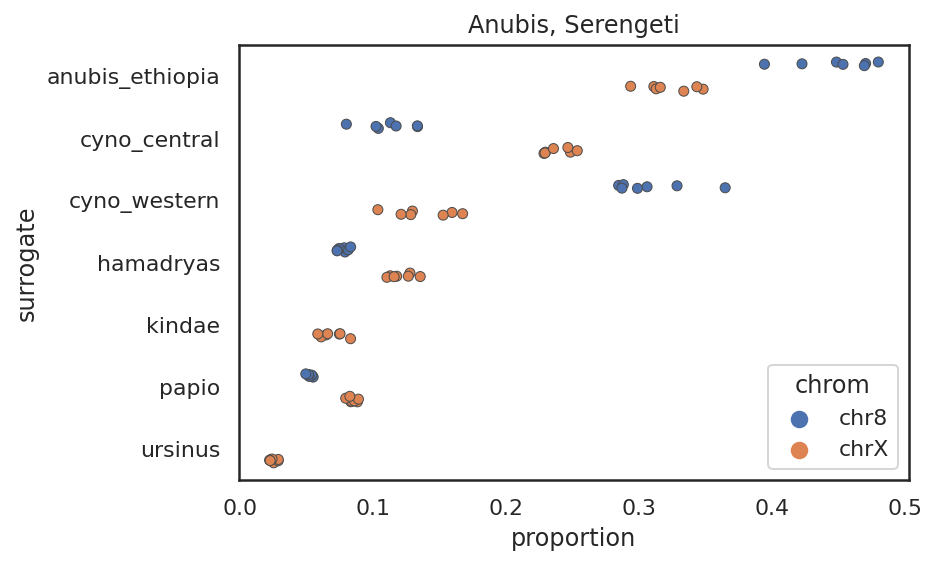

In [79]:
anubis_serengeti = df_ancestry.loc[df_ancestry.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Serengeti, Tanzania"].PGDP_ID)]

sns.stripplot(data=anubis_serengeti.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", dodge=True, linewidth=0.5).set(title="Anubis, Serengeti")

<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

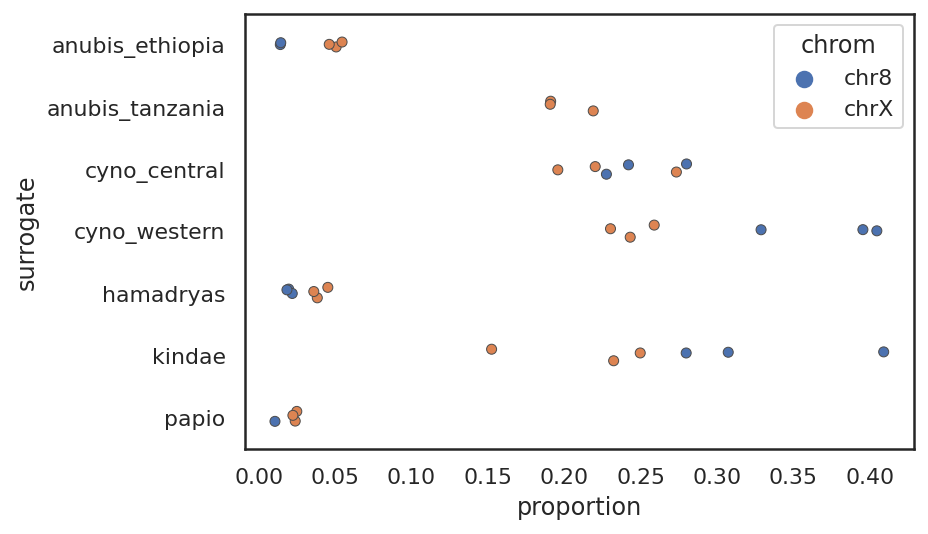

In [69]:
sns.stripplot(data=df_ancestry.loc[df_ancestry.population=="ursinus"].sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate", hue="chrom", linewidth=0.5)

<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

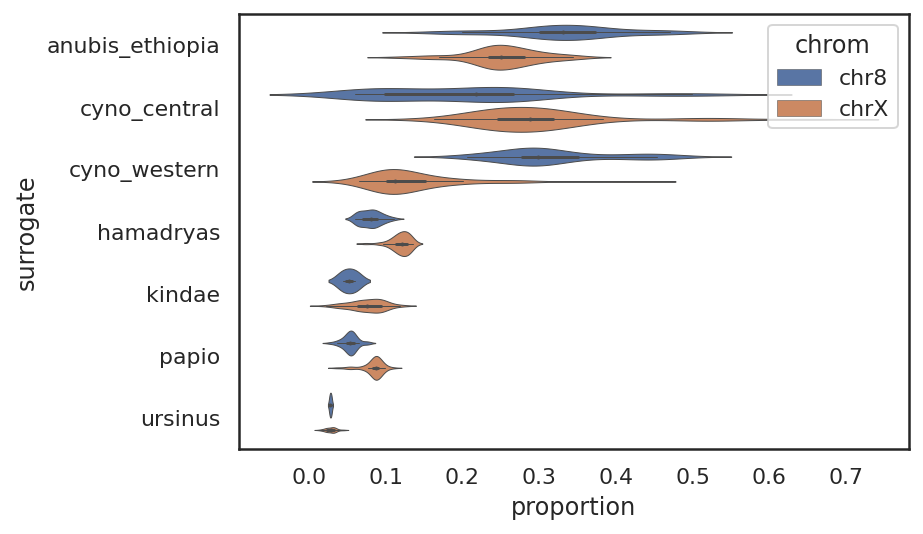

In [41]:
sns.violinplot(data=df_ancestry.loc[df_ancestry.population=="anubis_tanzania"].sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate", hue="chrom", linewidth=0.5)

In [80]:
step_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/"
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_7_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "population", "inclusion"])
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")

rundir = "chr8_7_cluster_large/"
chrom = "chr8"
df_l = []
for population in idfile.loc[idfile.inclusion==1].population.unique():
    for ID in idfile.loc[(idfile.inclusion==1) & (idfile.population == population)].PGDP_ID:
        total_path = step_path+rundir+population+"_"+rundir+"globetrotter_intermediate/"+ID+".main.txt"
        df = total_ancestry_parse(total_path, ID, population, chrom)
        df_l.append(df)

rundir = "chrX_7_cluster_large/"
chrom = "chrX"
for population in idfile.loc[idfile.inclusion==1].population.unique():
    for ID in idfile.loc[(idfile.inclusion==1) & (idfile.population == population)].PGDP_ID:
        total_path = step_path+rundir+population+"_"+rundir+"globetrotter_intermediate/"+ID+".main.txt"
        df = total_ancestry_parse(total_path, ID, population, chrom)
        df_l.append(df)
df_ancestry = pd.concat(df_l)
df_ancestry = df_ancestry.astype({"proportion": float})
df_ancestry_7 = df_ancestry


#chr8
chrom = "chr8"
l_l = []
i = 0
sort_pop = sorted(idfile.loc[idfile.inclusion==1].population.unique())
for population in sort_pop:
    pop_df = df_ancestry.loc[(df_ancestry.population == population) & (df_ancestry.chrom == chrom)]
    ID_count = len(pop_df.PGDP_ID.unique())
    l_l.append([])
    l_l[i].append(population)
    for surrogate in sort_pop:
        l_l[i].append(sum(pop_df.loc[pop_df.surrogate == surrogate].proportion)/ID_count)
    i += 1
df_8 = pd.DataFrame(columns=["Species"]+sort_pop,
                  data=l_l)
df_8_7 = df_8.set_index('Species')
df_8_7.columns.name = "Source populations"
df_8_7

#chrX
chrom = "chrX"
l_l = []
i = 0
sort_pop = sorted(idfile.loc[idfile.inclusion==1].population.unique())
for population in sort_pop:
    pop_df = df_ancestry.loc[(df_ancestry.population == population) & (df_ancestry.chrom == chrom)]
    ID_count = len(pop_df.PGDP_ID.unique())
    l_l.append([])
    l_l[i].append(population)
    for surrogate in sort_pop:
        l_l[i].append(sum(pop_df.loc[pop_df.surrogate == surrogate].proportion)/ID_count)
    i += 1
df_X = pd.DataFrame(columns=["Species"]+sort_pop,
                  data=l_l)
df_X_7 = df_X.set_index('Species')
df_X_7.columns.name = "Source populations"
df_X_7

Source populations,anubis_ethiopia,cyno_anubis_t,cyno_western,hamadryas,kindae,papio,ursinus
Species,,,,,,,
anubis_ethiopia,0.000000,0.744165,0.028937,0.142894,0.033817,0.039178,0.009864
cyno_anubis_t,0.299471,0.000000,0.232549,0.162570,0.129772,0.112756,0.062883
cyno_western,0.019490,0.526326,0.000000,0.022927,0.350340,0.000000,0.071865
hamadryas,0.275422,0.576290,0.048845,0.000000,0.043282,0.042343,0.013818
kindae,0.061097,0.376626,0.395876,0.052028,0.000000,0.031865,0.082509
papio,0.119973,0.661667,0.048953,0.083944,0.063869,0.000000,0.021594
ursinus,0.047409,0.431005,0.247319,0.039175,0.211934,0.023158,0.000000


/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Cyno, Mikumi')]

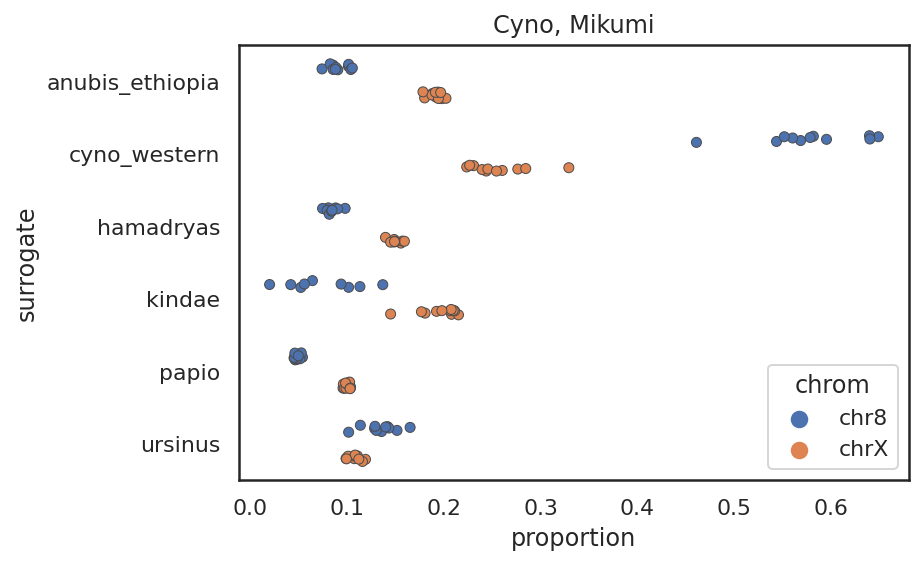

In [81]:
cyno_mikumi = df_ancestry.loc[df_ancestry.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Mikumi, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_mikumi.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5).set(title="Cyno, Mikumi")

/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Cyno, Ruaha')]

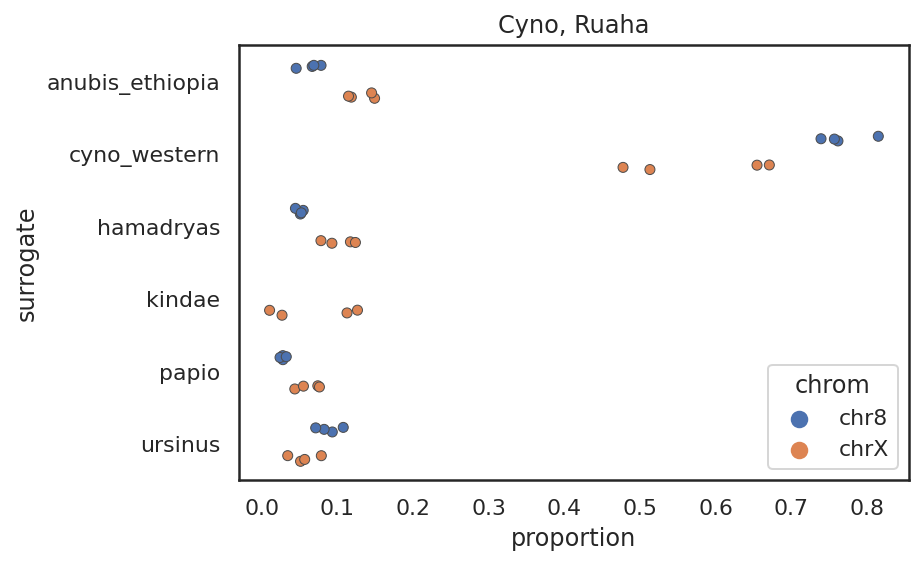

In [82]:
cyno_ruaha = df_ancestry_7.loc[df_ancestry_7.PGDP_ID.isin(meta_data_samples.loc[meta_data_samples.Origin == "Ruaha, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_ruaha.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5).set(title="Cyno, Ruaha")

/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

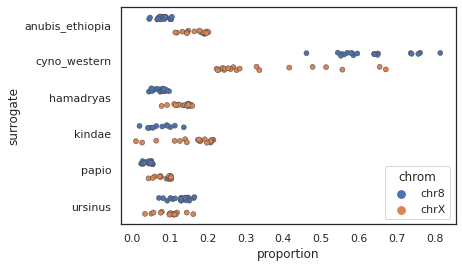

In [15]:
cyno_mikumi = df_ancestry.loc[df_ancestry.PGDP_ID.\
            isin(meta_data_samples.loc[meta_data_samples.C_origin == "Cynocephalus, Central Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_mikumi.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5)

/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Anubis, Tarangire')]

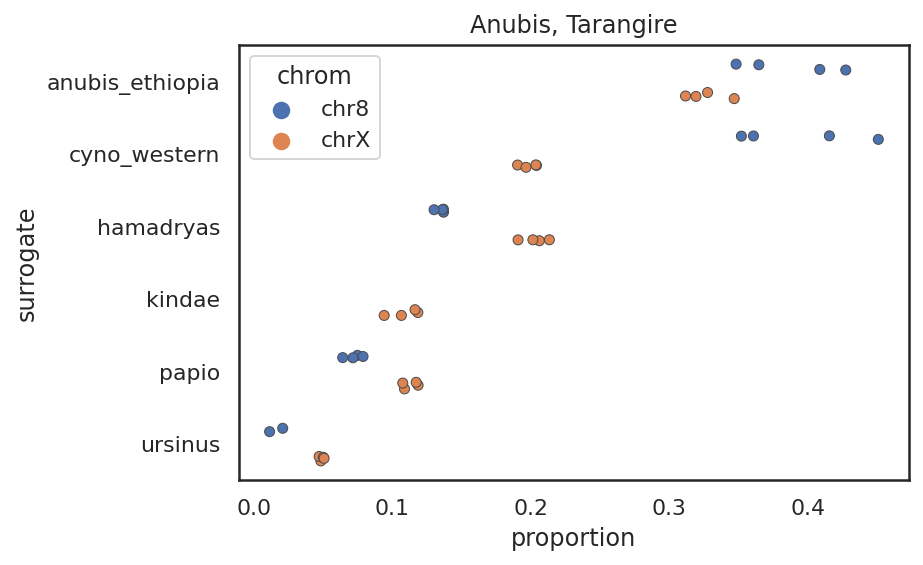

In [83]:
anubis_tarangire = df_ancestry.loc[df_ancestry.PGDP_ID.\
            isin(meta_data_samples.loc[meta_data_samples.Origin == "Tarangire, Tanzania"].PGDP_ID)]

sns.stripplot(data=anubis_tarangire.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5).set(title="Anubis, Tarangire")

/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

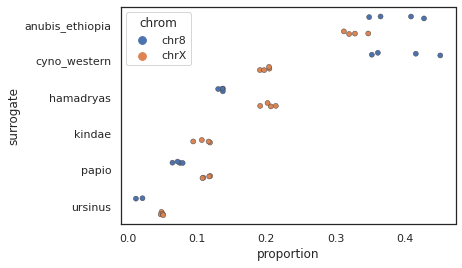

In [17]:
cyno_mikumi = df_ancestry.loc[df_ancestry.PGDP_ID.\
            isin(meta_data_samples.loc[meta_data_samples.Origin == "Tarangire, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_mikumi.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5)

/home/eriks/miniconda3/envs/geo_env/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='proportion', ylabel='surrogate'>

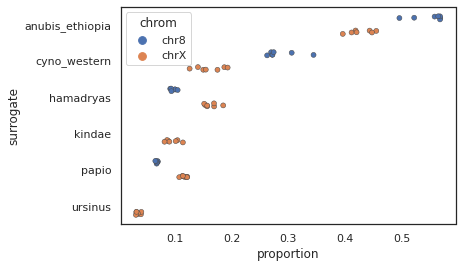

In [18]:
cyno_mikumi = df_ancestry.loc[df_ancestry.PGDP_ID.\
            isin(meta_data_samples.loc[meta_data_samples.Origin == "Serengeti, Tanzania"].PGDP_ID)]

sns.stripplot(data=cyno_mikumi.sort_values(by=["surrogate", "chrom"]), x="proportion", y="surrogate",
              hue="chrom", split=True, linewidth=0.5)